# Spectral Feature Extraction Exercise

This notebook computes PSDs and extracts spectral features from eyes open and eyes closed Muse data. The MNE and FOOOF libraries are used.

In [1]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mne
from mne import io

from fooof import FOOOFGroup, fit_fooof_group_3d

%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]


## Load Data

In [2]:
eyes_open_fnames = glob.glob('/Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/*n_o_*.fif')
eyes_closed_fnames = glob.glob('/Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/*n_c_*.fif')

In [3]:
raws_eo = list()
raws_ec = list()

for fname in eyes_open_fnames:      
    raws_eo.append(io.read_raw_fif(fname).load_data())
    
for fname in eyes_closed_fnames:      
    raws_ec.append(io.read_raw_fif(fname).load_data())


Opening raw data file /Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/001_n_o_Muse-64F4_2018-10-18--12-40-51_1549231218830.fif...
Isotrak not found
    Range : 0 ... 32291 =      0.000 ...   126.137 secs
Ready.


<ipython-input-3-91e70d1cd63f>:5: RuntimeWarning: This filename (/Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/001_n_o_Muse-64F4_2018-10-18--12-40-51_1549231218830.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raws_eo.append(io.read_raw_fif(fname).load_data())


Reading 0 ... 32291  =      0.000 ...   126.137 secs...
Opening raw data file /Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/002_n_o_Muse-64F4_2018-10-18--12-49-03_1549231218832.fif...
Isotrak not found
    Range : 0 ... 32255 =      0.000 ...   125.996 secs
Ready.
Reading 0 ... 32255  =      0.000 ...   125.996 secs...
Opening raw data file /Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/002_n_c_Muse-64F4_2018-10-18--12-54-27_1549231218830.fif...
Isotrak not found
    Range : 0 ... 32291 =      0.000 ...   126.137 secs
Ready.
Reading 0 ... 32291  =      0.000 ...   126.137 secs...
Opening raw data file /Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/001_n_c_Muse-64F4_2018-10-18--12-44-53_1549231218576.fif...
Isotrak not found
    Range : 0 ... 32435 =      0.000 ...   126.699 secs
Ready.
Reading 0 ... 32435  =      0.000 ...   126.699 secs...


<ipython-input-3-91e70d1cd63f>:5: RuntimeWarning: This filename (/Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/002_n_o_Muse-64F4_2018-10-18--12-49-03_1549231218832.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raws_eo.append(io.read_raw_fif(fname).load_data())
<ipython-input-3-91e70d1cd63f>:8: RuntimeWarning: This filename (/Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/002_n_c_Muse-64F4_2018-10-18--12-54-27_1549231218830.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raws_ec.append(io.read_raw_fif(fname).load_data())
<ipython-input-3-91e70d1cd63f>:8: RuntimeWarning: This filename (/Users/nicoleproulx/Documents/Code/muse_dsp_workshop/data/001_n_c_Muse-64F4_2018-10-18--12-44-53_1549231218576.fif) does not conform to MNE naming conventi

## Raw example

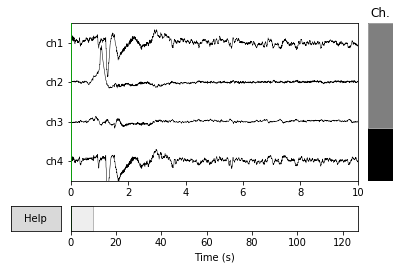

In [4]:
raw_expl = raws_ec[1]
fig = raw_expl.plot(n_channels=4, scalings={'eeg': 100e-6})

### Epoch data

In [5]:
STEP = 5
WIN_LEN = 5

events = mne.make_fixed_length_events(raw_expl, duration=STEP)
epochs = mne.Epochs(raw_expl, events, tmin=0, tmax=WIN_LEN,
                    baseline=None, reject={'eeg': 100e-6}, picks=[0,1,2,3])


25 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


### Compute PSDs

In [6]:
psds, freqs = mne.time_frequency.psd_multitaper(epochs, fmin=0, fmax=80, bandwidth=1)

log_psds = np.log10(psds)
psds_mean = log_psds.mean(0)

Loading data for 25 events and 1281 original time points ...
    Rejecting  epoch based on EEG : ['ch1', 'ch2', 'ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch2', 'ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch2', 'ch3', 'ch4']
4 bad epochs dropped
    Using multitaper spectrum estimation with 4 DPSS windows


### Plot single epoch PSD

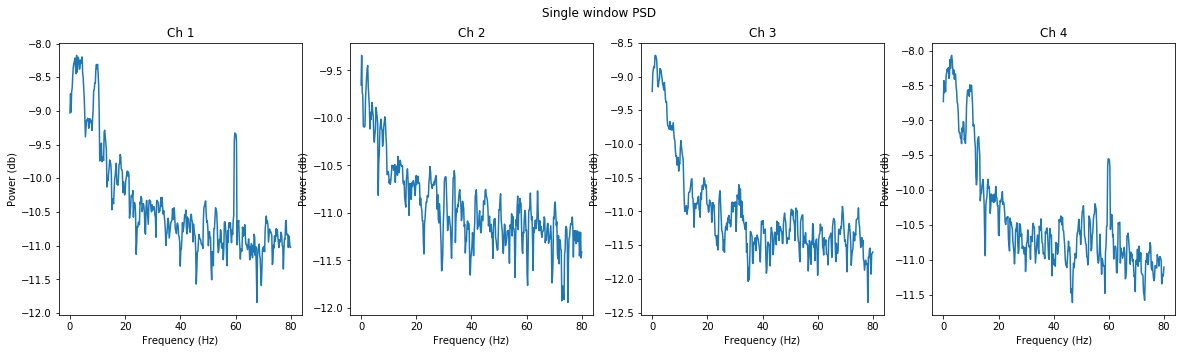

In [7]:
# single window    
fig, axes = plt.subplots(1,4, figsize=(20,5))
plt.suptitle('Single window PSD')
for i, ax in enumerate(axes):
    ax.plot(freqs, log_psds[5, i, :])
    ax.set_title('Ch {}'.format(i + 1))   
    ax.set_ylabel('Power (db)')
    ax.set_xlabel('Frequency (Hz)')

### Plot mean PSD across epochs

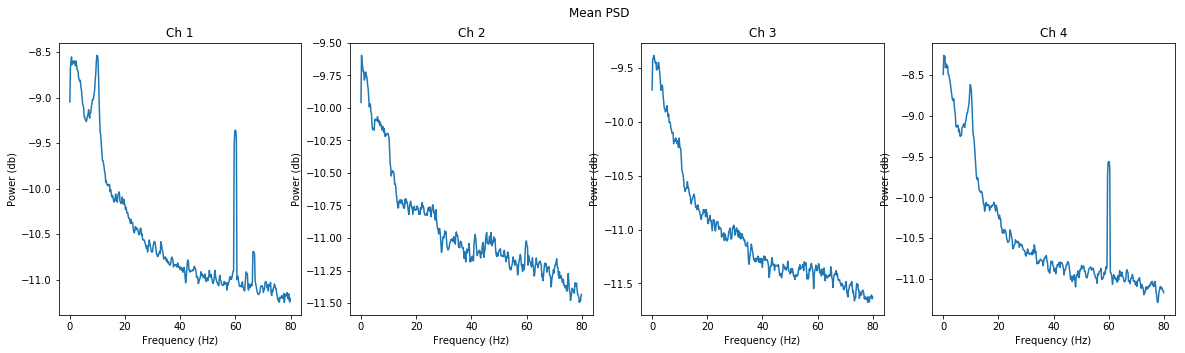

In [8]:
fig, axes = plt.subplots(1,4, figsize=(20,5))
plt.suptitle('Mean PSD')
for i, ax in enumerate(axes):
    ax.plot(freqs, psds_mean[i, :])
    ax.set_title('Ch {}'.format(i + 1))
    ax.set_ylabel('Power (db)')
    ax.set_xlabel('Frequency (Hz)')
    

## Extract Spectral Features

In [9]:
STEP = 15
WIN_LEN = 30

raw_eo = mne.concatenate_raws(raws_eo)
raw_ec = mne.concatenate_raws(raws_ec)

events_eo = mne.make_fixed_length_events(raw_eo, id=0, duration=STEP)
events_ec = mne.make_fixed_length_events(raw_ec, id=1, duration=STEP)

epochs_eo = mne.Epochs(raw_eo, events_eo, tmin=0, tmax=WIN_LEN,
                       baseline=None, reject={'eeg': 100e-6}, picks=[0,1,2,3])
epochs_ec = mne.Epochs(raw_ec, events_ec, tmin=0, tmax=WIN_LEN,
                       baseline=None, reject={'eeg': 100e-6}, picks=[0,1,2,3])

16 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
16 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


In [10]:
psds_eo, freqs = mne.time_frequency.psd_multitaper(epochs_eo, fmin=0, fmax=80, bandwidth=1)
psds_ec, freqs = mne.time_frequency.psd_multitaper(epochs_ec, fmin=0, fmax=80, bandwidth=1)



Loading data for 16 events and 7681 original time points ...
    Rejecting  epoch based on EEG : ['ch1', 'ch4']
    Rejecting  epoch based on EEG : ['ch4']
    Rejecting  epoch based on EEG : ['ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch4']
7 bad epochs dropped
    Using multitaper spectrum estimation with 28 DPSS windows
Loading data for 16 events and 7681 original time points ...
    Rejecting  epoch based on EEG : ['ch1', 'ch4']
    Rejecting  epoch based on EEG : ['ch4']
    Rejecting  epoch based on EEG : ['ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch2', 'ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch2', 'ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch2', 'ch3', 'ch4']
    Rejecting  epoch based on EEG : ['ch1', 'ch2', 'ch3', 'ch4']
10 bad epochs dropped
    Using multitaper spectrum estimation with 28 DPSS windows


### Compute Band Powers

In [11]:
FREQ_BANDS = {'delta': (1, 4),
              'theta': (4, 8),
              'alpha': (8, 13),
              'beta': (13, 30),
              'gamma': (30, 44)}
band_names = list(FREQ_BANDS.keys())

band_powers_eo = np.empty((psds_eo.shape[0], psds_eo.shape[1], len(band_names)))
band_powers_ec = np.empty((psds_ec.shape[0], psds_ec.shape[1], len(band_names)))


for ind, band in enumerate(band_names):
    mask = np.array((freqs >= FREQ_BANDS[band][0]) &
                    (freqs <= FREQ_BANDS[band][1]))
    band_powers_eo[:, :, ind] = np.nansum(psds_eo[:, :, mask], axis=-1)
    band_powers_ec[:, :, ind] = np.nansum(psds_ec[:, :, mask], axis=-1)


### Compute FOOOF

In [12]:
fooof_settings = {'peak_width_limits' : [1, 6],
                  'max_n_peaks' : 4,
                  'min_peak_amplitude' : 0.15,
                  'peak_threshold' : 1.5,
                  'background_mode' : 'fixed'}

fg_ec = FOOOFGroup(**fooof_settings)
fgs_ec = fit_fooof_group_3d(fg_ec, freqs, np.swapaxes(psds_ec, 0, 1),
                           freq_range=[3, 40])
fg_eo = FOOOFGroup(**fooof_settings)
fgs_eo = fit_fooof_group_3d(fg_eo, freqs, np.swapaxes(psds_eo, 0, 1),
                           freq_range=[3, 40])

Running FOOOFGroup across 6 power spectra.
Running FOOOFGroup across 6 power spectra.
Running FOOOFGroup across 6 power spectra.
Running FOOOFGroup across 6 power spectra.
Running FOOOFGroup across 9 power spectra.
Running FOOOFGroup across 9 power spectra.
Running FOOOFGroup across 9 power spectra.
Running FOOOFGroup across 9 power spectra.


Running FOOOFGroup across 6 power spectra.
                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 6                              
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 0.03 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                  

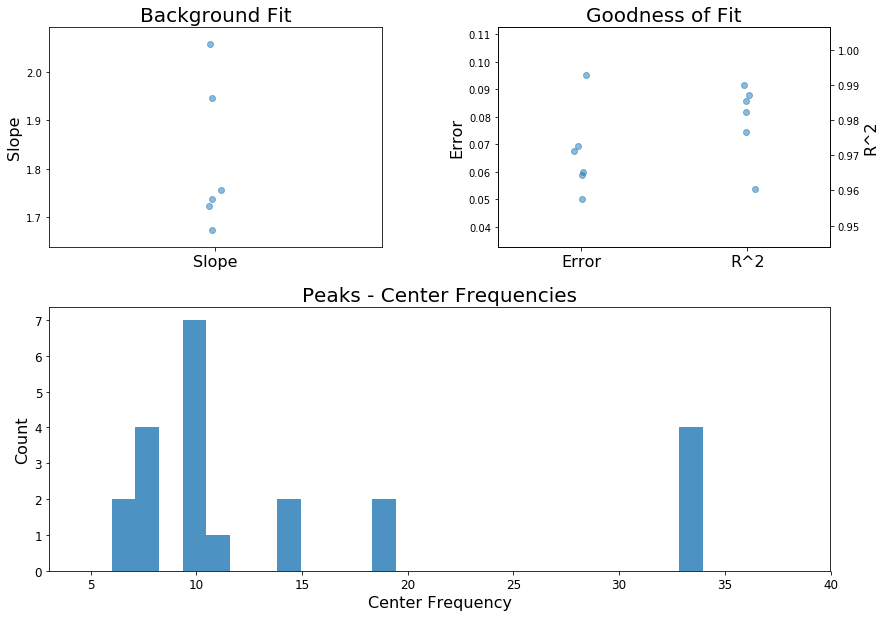

In [13]:
fg_ec.report()

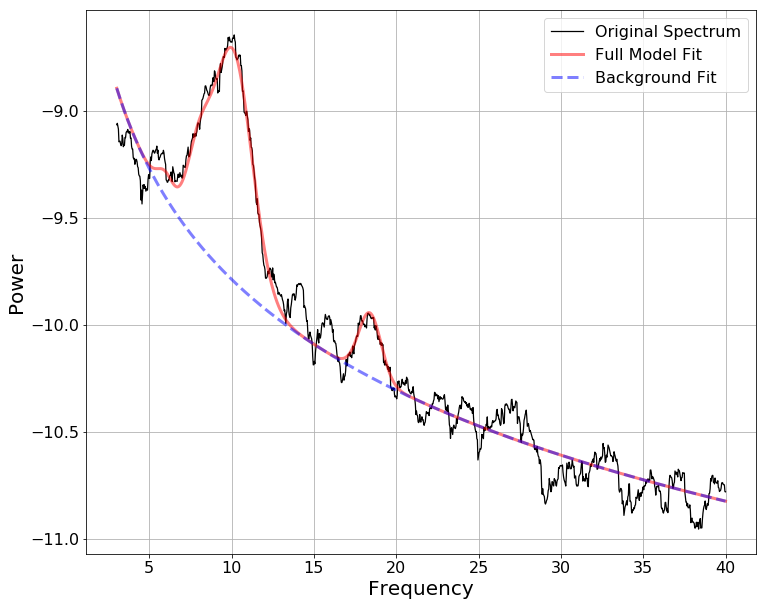

In [14]:
fm = fg_ec.get_fooof(ind=5, regenerate=True)
fm.plot()

# fm.save('fooof_example', save_data=True, save_results=True, save_settings=True)

### FOOOF Features

In [36]:
sls_ec = fg_ec.get_all_data('background_params', 'slope')
sls_eo = fg_eo.get_all_data('background_params', 'slope')
intercepts_ec = fg_ec.get_all_data('background_params', 'intercept')
intercepts_eo = fg_eo.get_all_data('background_params', 'intercept')

pk_freq_ec = fg_ec.get_all_data('peak_params', 'CF')
pk_amp_ec = fg_ec.get_all_data('peak_params', 'Amp')

### Plot Features

In [43]:
feats_array_ec = np.concatenate([sls_ec.reshape(-1, 1), intercepts_ec.reshape(-1, 1)], axis=1)
feats_array_eo = np.concatenate([sls_eo.reshape(-1, 1), intercepts_eo.reshape(-1, 1)], axis=1)

In [44]:
feats_df_ec = pd.DataFrame(data=feats_array, columns=['1/f slope', '1/f intercept'])
feats_df_ec['label'] = 'eyes_closed'
feats_df_eo = pd.DataFrame(data=feats_array, columns=['1/f slope', '1/f intercept'])
feats_df_eo['label'] = 'eyes_open'

feats_df = pd.concat([feats_df_eo, feats_df_ec], axis=0)

In [45]:
feats_df_eo.head()

,1/f slope,1/f intercept,label
0,2.057891,-7.669517,eyes_open
1,1.945997,-7.835110,eyes_open
2,1.737852,-8.122574,eyes_open
3,1.672340,-8.178070,eyes_open
4,1.756115,-8.027610,eyes_open
